# К ближайших соседей (kNN)

К ближайших соседей (k-nearest neighbors) - алгоритм, который хранит данные и определяет класс для объекта по схожести c другими, класс определяется по классам соседей.

Алгоритм делает все вычисления при предсказании, а не при обучении. Хранит всю тренировочную выборку в себе.

Посмотрим, как работает алгоритм на примере с вином. Рассмотрим 2 химических компонента: рутим и мирицетин. По измерению их уровней в вине напитки делятся на красное и белое вино. Так каждый напиток можно представить как точку с кординатами (уровень рутина; уровень мирицетина).

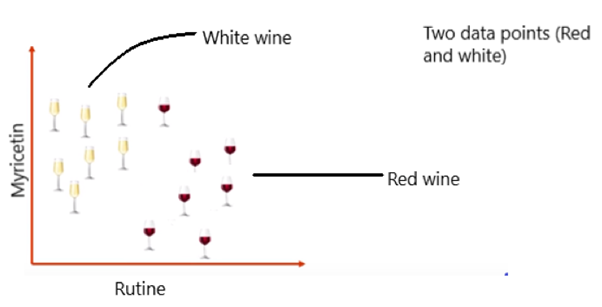


Допустим, для точек с вином на графике уже известно, красное оно или белое. Определим класс для новой точки, зная только значения уровня веществ.

Добавим новую точку на этот же график и определим тип(белое это или красное вино). Назовем это целевым признаком, то есть это то, что ищем.

Сделаем это при помощи KNN. Для этого выберем К ближайших к этой точке соседей(для этого нужно посчитать расстояние до других точек), посмотреть на значения их целевого признака и методом большинства решить, к какому классу относится это вино.

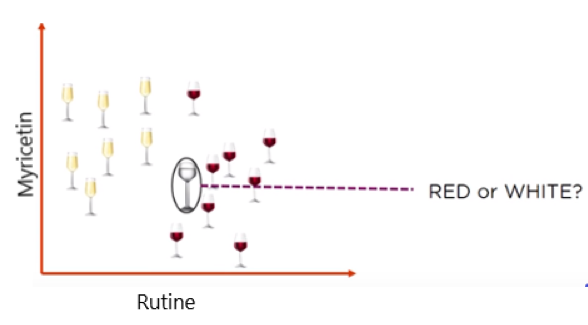

Возьмем k = 5 и посмотрим на ближайших соседей. 4 соседа из 5 - красное вино, значит и вино, добавленное как новая точка, тоже красное.


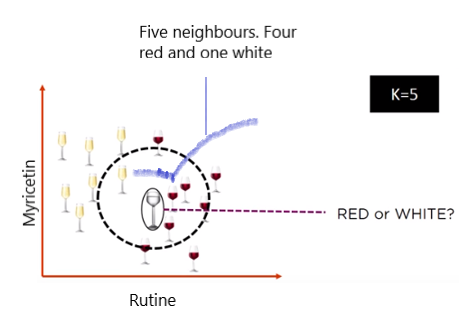





Мы определили к какому классу вина относится новая точка, то есть решили задачу классификации.

Теперь рассмотрим KNN подробнее и напишем его самостоятельно.


## K ближайших соседей kNN (Теория)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

kNN - это метрический алгоритм, предполагающий, что объекты одного класса в пространстве находятся близко друг к другу. В зависимости от выбора k - количества ближайших соседей и метрики расстояния, качество может сильно отличаться.

Алгоритм ленивый, то есть производит вычисления при предсказании, а не при обучении, тренировочную выборку хранит в себе. В примере с винами не было обучения, брали набор значений, новую точку и искали ее соседей в наборе. 

Идея алгоритма:
1. Взять новый объект и вычислить все расстояния по некоторой метрике от него до других объектов
2. Выбрать k ближайших соседей к этому объекту
3. Класс объекта - это класс наиболее часто встречающегося объекта среди k соседей.

В алгоритм можно внести изменение добавив веса для каждого объекта или класса. Например, при выборе класса смотрят не на большинство соседей, а на какую-то взвешенную сумму.

### Метод ближайших соседей в реальных задачах

- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются приближенными методами поиска ближайших соседей. Вот лекция Артема Бабенко про эффективные алгоритмы поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку Annoy.

### Качество классификации методом ближайших соседей зависит от нескольких параметров:

- число соседей
- метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100. То есть алгоритм страдает от *проклятия размерностей*.
- веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

### Метрики расстояния

Для поиска ближайших соседей используется расстояние, однако оно может быть разным, в зависимости от того, какую метрику использовать

Аксиомы метрики:

1. $\rho(x,y) \ge 0$
2. $\rho(x,y) = \rho(y,x)$
3. $\rho(x,y) \ge \rho(x,z) + \rho(z,y)$

#### Евклидова метрика

$\large \rho(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$

#### Манхэттенская метрика

$\large \rho(x,y) = \sum_{i=1}^{n}{|x_i - y_i|}$

####  Минковского метрика

$\large \rho(x,y) = {(\sum_{i=1}^{n}{|x_i - y_i| ^ q})} ^ \frac{1}{q}$

#### Косинусная метрика

$\large \rho(x,y) = \arccos(\frac{\langle{x,y}\rangle}{\|x\|\|y\|}) = \arccos{\frac{\sum^d_{i=1}{x_i y_i}}{(\sum^d_{i=1}{x_i^2})^{1/2}(\sum^d_{i=1}{y_i^2})^{1/2}}}$

![](https://i.imgur.com/0aBH1bO.png)

### Масштаб признаков 

Исходя из формулы метрики расстояния между объектами в пространстве, можно сделать вывод, что масштаб признаков определяет их значимость. Например, умножим один из признаков на константу C. Тогда Евклидово расстояние примет вид: $$p_2(x,y) = \sqrt{C(x_1-y_1)^2+\sum_{i=2}^{d}{(x_i-y_i)^2}}$$ Таким образом, различие по первому признаку будет считаться в C раз более значимым, чем различия по всем остальным признакам. При этом расположение объектов относительно друг друга не изменилось - изменился лишь масштаб!

Если мы возьмем задачу, в которой измеряется рост в сантиметрах и вес в килограммах людей, и будем на этих данных предсказывать что-то, то рост будет всегда иметь большую важность, чем вес.  
Чтобы избежать проблему масштаба, признаки нужно нормировать. Это можно делать следующими способами: 

- Нормировка на единичную дисперсию: $\widetilde{x} = \frac{x - \overline{x}}{\sigma(x)}$
- Нормировка на отрезок [0,1]: $\widetilde{x} = \frac{x - min(x)}{max(x) - min(x)}$

### Проклятие размерности

Проблема заключается в невозможности эффективного поиска ближайших соседей для заданной точки в многомерном пространстве. Это происходит из-за того, что все объекты выборки равномерно распределены по d-мерной сфере и равноудалены друг от друга. Например, для kNN для 5 соседей и 5000 объектов в выборке размерность должна быть не больше 10, чтобы решение было более менее эффективным. 

Подробнее об этом прочитайте в материалах к [Семинарам по машинному обучению, ВМК МГУ](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem02_knn.pdf).

![](https://i.imgur.com/VZkE79X.png)

$\LARGE \lim_{n \rightarrow \infty}{0.99^n} = 0$

## Практика

### Классификация

Реализуем собственный KNN, проверим его работу на точках и датасете с цифрами


Для начала запустите ячейки с кодом ниже. В ячейках будут комментарии с пояснениями к коду

In [1]:
# numpy - библиотека для работы с массивами(матрицами в том числе), помогает делать различные операции над ними
import numpy as np
# matplotlib, seaborn понадобятся для рисования графиков, отображения изображений
from matplotlib import pyplot as plt
import seaborn as sns

# с помощью этой команды графики будут отображаться в текущем окне в ноутбуке под ячейкой, где написан код для отображения графика 
%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

Сгененируем точки для трех классов, у каждого класса 50 точек, каждая из которых имеет 2 координаты. 

Будем для этого использовать [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) и добавим еще одну 

Добавим еще точку `point`, позже определим ее класс

Первый класс имеет синий цвет на графике, второй - оранжевый, третий - зелёный.



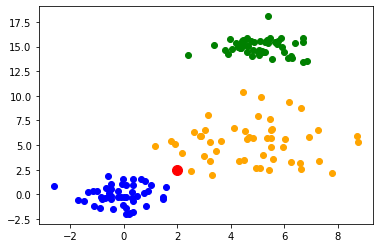

In [2]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')

point = [2, 2.5]
plt.scatter(point[0], point[1], s = 100, color='red')

Реализуем kNN самостоятельно. Нам будет достаточно написать функцию вычисления результирующего класса. 

**Вопрос:** почему не нужно реализовывать этап обучения алгоритма? и есть ли он?




# Задание 1

Напишите функцию евклидовой метрики `euclidian_metric(a, b)`, где a и b - массивы точек.

Всё, что нужно сделать - это вернуть значение формулы $\large \rho(x,y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$

_Справка по питону_:
Прочитать как использовать функции и посмотреть примеры можно [тут](https://www.w3schools.com/python/python_functions.asp) и [тут, но на русском](https://pythonworld.ru/tipy-dannyx-v-python/vse-o-funkciyax-i-ix-argumentax.html)

Так как мы работаем с массивами, то будем использовать numpy и функции [np.power()](https://numpy.org/doc/stable/reference/generated/numpy.power.html), [np.sqrt()](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html), [np.sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

Чтобы понять, как работает каждая функция читайте документацию, там приводятся примеры использования

**Подсказка**: обратите внимание на axis в сумме `np.sum()`, ниже есть ячейка с кодом, которая показывает разницу между разными значениями этого параметра, для вычисления нормы вам нужна сумма по строкам.


In [3]:
# Пример, показывающий разницу между axis
array = [[1,2,3],[1,2,3],[1,2,3]]
print('Сумма при axis = 0: {0}'.format(np.sum(array, axis = 0)))
print('Сумма при axis = 1: {0}'.format(np.sum(array, axis = 1)))

Сумма при axis = 0: [3 6 9]
Сумма при axis = 1: [6 6 6]


In [4]:
def euclidian_metric(a: np.ndarray, b: np.ndarray):  # реализуем Евклидову метрику через норму
    '''
    Алгоритм находит расстояние между массивами точек.
    Это позволяет не писать циклы в коде и ускоряет вычисления.
    
    N - количество точек
    D - размерность точки
    
    Args:
        a (np.ndarray): массив точек в виде матрицы размера (N, D)
        b (np.ndarray): массив точек в виде матрицы размера (N, D)
    Returns:
        np.ndarray: массив расстояний в виде матрицы размера (N, 1)
    '''
    #############
    #  ВАШ КОД  #
    #############
    return 0

In [5]:
# запустим эту ячейку, чтобы проверить, всё ли верно реализовано на текущем этапе
# если возникает ошибка в assert, то при реализации функций была допущена ошибка
# если появляется текст из print - на данном этапе ошибок нет
a = np.zeros((1,4))
b = np.ones((1,4))

res = euclidian_metric(a,b)
assert res.shape == (1,)
assert res[0] == 2
print('ошибок нет')

ошибок нет


Далее реализуем функции, необходимые нам для вычисления класса по методу ближайших соседей.

# Задание 2.1

Напишите функцию, которая по уже рассчитанным расстояниям от точек `y` до нашей точки (`distances`) находит и возвращает `k` ближайших соседей и соответствующие расстояния до них.

На вход подается расстояния `distances` от текущей точки(класс которой нужно определить) до точек в пространстве.

1. Нужно взять k точек с наименьшим расстоянием
2. и посмотреть, к какому классу они относятся

Для 1) используйте `np.argsort` - вернет отсортированные по значениям старые индексы 

Для 2): получаем из `у` классы по отсортированным в 1) значениям и берем первые к к элементов (ближайших к соседей)

Аналогично делаем с растояниями до этих соседей

In [6]:
def _find_neighbours(k, y, distances):
    '''
    point - заданная точка до которой мы ищем ближйших
    distances = [euclidian_metric(x, point) for x in X]
    
    Args:
        k (int): количество соседей
        y (np.ndarray): вектор-столбец размера (N, 1) для меток классов датасета
        distances (np.ndarray): вектор столбец расстояний от какой-то точки x до всех точек датасета, размер (N, 1)
    Returns:
        np.ndarray: neighbours - вектор столбец индексов объектов из y
        np.ndarray: neighbours_distances - вектор столбец расстояний до ближайших соседей
    '''
    #############
    #  ВАШ КОД  #
    #############
    
    return neighbours, neighbours_distances

In [7]:
Y = np.arange(10) # 0 1 2 3 4 5 6 7 8 9 10
dist = np.linspace(10, 100, 10) # 0 11 22 33 ...
neighbours = _find_neighbours(3, Y, dist)  
real_neighbours = ([0, 1, 2], [10, 20, 30])
for i in range(len(neighbours)):
    for j in range(len(neighbours[i])):
        assert neighbours[i][j] == real_neighbours[i][j]
print('Если вы видите этот текст, но не видите ошибку, то всё работает корректно!')

Если вы видите этот текст, но не видите ошибку, то всё работает корректно!


## Справка по питону: слайсы

In [8]:
# как можно брать значения из некоторых структур данных для хранения объектов. 
# чтобы узнать больше читайте про slice(срезы) в python
array = np.array([12,0,3,2,5,1,1])
#array[начало:конец:шаг]
print(array[3:])  # элементы с третьего
print(array[:3])  # элементы до третьего
print(array[2::2])  # каждый 2 элемент начиная со второго элемента
args = np.array([2,1,3])
print(array[args]) # берем второй, первый и третий элемент

[2 5 1 1]
[12  0  3]
[3 5 1]
[3 0 2]


In [9]:
# еще можно использовать маски
print(array[array < 3])  # берем все элементы списка меньше 3
print(array[array == 1])  # все элементы массива равные 1

# маска передается в виде значений True/False, например,
print(array < 3)

# еще можно передавать индексы массивом 
ind = [1,2,5]
print(array[ind])


[0 2 1 1]
[1 1]
[False  True False  True False  True  True]
[0 3 1]


Статью с примерами использования индексов, масок и срезов можно почитать [здесь](https://junaidsqazi.medium.com/a6-numpy-part-2-indexing-slicing-broadcasting-fancy-indexing-boolean-masking-universal-d85610eccfe7). 

# Задание 2.2

Реализуйте функцию, выделяющую преобладающий класс среди соседних объектов. Если есть конкурирующие классы, то нужно вернуть их все.

Конкурирующими считаются те классы, для которых количество принадлежащих им объектов равно между собой и при этом наибольшее среди всех классов, представленных в подвыборке.

**Hint:**  

1.   используйте `np.unique` и `return_counts`, чтобы узнать, сколько раз встречалось каждое значение
2.   среди счетчиков найдите максимальное значение
3. по этому максимальному значению верните все классы, для которых значение счетчика соответствует максимуму (используйте маски)


In [10]:
u, cnts = np.unique([1,2,1,5,2,3], return_counts=True)
cnts[np.argmax(cnts)]
np.max(cnts)

2

In [11]:
def _get_closest_classes(neighbours):
    '''
    Args:
        neighbours (np.ndarray): вектор столбец меток классов
    Returns:
        np.ndarray: список меток наиболее преобладающих классов.
    '''
    #############
    #  ВАШ КОД  #
    #############

    return best_classes

In [12]:
# sanity check
assert _get_closest_classes(np.asarray([1,2,3,2,2])) == [2]
closest = _get_closest_classes(np.asarray([1,2,3,2,3]))
assert closest[0] == 2 and closest[1] == 3
print('get_closest_classes работает верно')

get_closest_classes работает верно


# Задание 2.3

Напишите функцию, которая выбирает наиболее подходящий класс, при условии, что есть несколько конкурирующих классов. 

Для этого будет необходимо посчитать среднее расстояние до объектов каждого класса и выбрать класс с наименьшим таким расстоянием.

In [13]:
def _choose_best_class(best_classes, neighbours, neighbouring_distances):
    '''
    Args:
        best_classes: массив лучших классов (C,1)
        neighbours: вектор столбец меток классов соседей (N,1)
        neighbouring_distances: вектор столбец расстояний (N,1)
    Returns:
        int: лучший класс
    '''
    #############
    #  ВАШ КОД  #
    #############

    return best_class

In [14]:
# sanity check
assert _choose_best_class([1,2], np.array([1, 2, 1, 3, 2]), np.asarray([0.5, 1, 1, 8, 0.6])) == 1
print('Проверка пройдена')

Проверка пройдена


Далее нужно реализовать функцию, делающую предсказание для одной точки, используя реализованные ранее функции.

In [15]:
# эта функция будет считать расстояния каждой точки элемента выборки x_pred до всех точек 
# в исходном датасете X и на основе расстояний вычислять принадлежность к классу

def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов

        neighbours, neighbouring_distances = _find_neighbours(k, y, distances)  # находим ровно k соседей этой точки
            
        best_classes = _get_closest_classes(neighbours)  # обнаруживаем классы, которые имеются среди соседей

        res[i] = _choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее релевантный класс по среднему расстоянию до него среди соседей
    return res

Запустим в лоб наш классификатор kNN и посмотрим, какое качество он нам выдаст. Воспользуемся `train_test_split`, чтобы разбить данные на тренировочную и валидационную выборки.

`train_test_split` используется, чтобы разбить данные на 2 части разного размера, по одной будем обучать, а вторую используем, чтобы проверить, насколько хорошо работают предсказания (используем один раз после конца обучения).

Модель просто запомнит значения целевого признака для каждого набора значений,если использовать одни данные для тренировки и проверки. Такая модель не сможет нормльно предсказывать значения для данных не из выборки.

В у лежит целевой признак, в Х - данные, по которым будем предсказывать значение целевого признака

Подробнее можно почитать по [ссылке1](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) и [ссылке2](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)


`accuracy_score` - это доля верных ответов алгоритма: после предсказания получаем y_pred и смотрим, сколько значений совпало с реальным значением `y`.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))

0.0


Теперь определим класс для точки `point`. Мы добавили ее в самом начале.

In [17]:
point = np.array([point]) # изначально точка добавлялась на график как список, но мы работает с numpy массивами
nearest_neighbours_classify(X_train, y_train, 5, point)[0]

34

## **MNIST**

Посмотрим, как работает KNN на рукописных цифрах, будем определять цифру по картинке 8х8

В этом случае используются уже не два значения, как это было для точки, а 64 (см. размер картинки). 
Каждое отвечает за значение цвета в пикселе, его цвет может быть от белого до черного. У одинаковых цифр будут близкие значения в каждой координате массива 8х8. 


In [18]:
from sklearn import datasets

# загружаем датасет с цифрами
# В Х загрузим картинки с цифрами, по Х предсказываем класс
# В y хранится значение целевого признака, что мы должны предсказать в итоге. 
X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


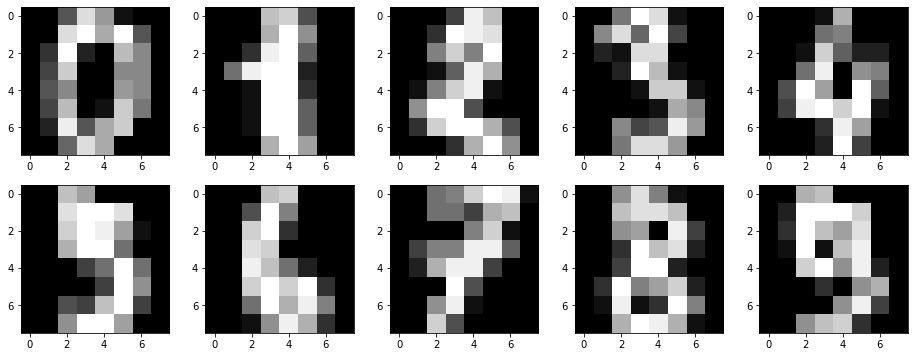

In [19]:
# выведем пример содержимого датасета с помощью кода ниже(10 цифр)
# Для начала зафиксируем размер итоговой фигуры(на нее будем добавлять изображения с цифрами)
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))
# Затем в цикле будем добавлять изображения на фигуру, используя функцию subplot, 
# она нужна для добавления независимых графиков\изображений на одной ячейке
# первое значение в subplot обозначает число строк, второе - число столбцов,
# то есть так можно добавить на график 5 в каждую строку, всего 2 строки
# Третье значение отвечает за текущую позицию(нумерация с 1), например, если позиция 6, то картинка добавится в первый столбец второго ряда(для текущих значений) 
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([width,width]), cmap='gray')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

print(accuracy_score(y_test, y_pred))

0.002777777777777778


### Бонусная секция
Теперь нарисуем и классифицируем число

С помощью кода ниже можете нарисовать и  классифицировать свою цифру.

**Спойлер:** результат предсказания может быть плохим: предсказываем цифру с изображения 8х8. Размер картинки довольно маленький, к тому же люди часто пишут цифры по-разному $-$ в мнисте это не предусмотрено (7 в мнисте очень похожа на 1, а вот написание 0 и 8 у людей обычно не сильно различается)

In [ ]:
# код, который делает магию и дает возможность рисовать в колабе
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="width: 160px; height: 160px"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = (e.pageX - this.offsetLeft)/10
  mouse.y = (e.pageY - this.offsetTop)/10
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=16, h=16, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [ ]:
# запустите эту ячейку, нарисуйте цифру.
# когда закончите, нажмите Finish
# рисовать нужно левее кнопки
draw(w=16, h=16, line_width=1)

In [ ]:
#поменяем размер изображения и сделаем его похожим на мнист

from PIL import Image

img = Image.open('drawing.png')

r = img.resize((8,8), Image.ANTIALIAS)
red, green, blue, alpha = r.split()

image_array = np.array(alpha).reshape((1, 64))
plt.imshow(image_array.reshape([8,8]), cmap='gray')

In [ ]:
y_pred = nearest_neighbours_classify(X_train, y_train, 5, image_array)
print('Это цифра ', y_pred[0])

# Классификация kNN из sklearn

Посмотрим, как использовать kNN из библиотеки sklearn.

In [22]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

<AxesSubplot:ylabel='count'>

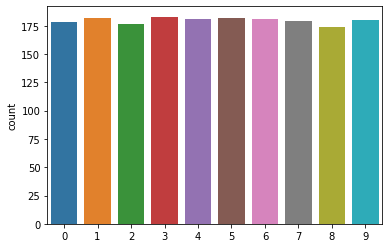

In [23]:
sns.countplot(x=y)

Целевой признак распределен равномерно по всем классам с некоторой погрешностью. Поэтому можно считать в лоб обычную точность предсказания и не бояться, что интерпретация будет неадекватна. НО при кроссвалидации происходят случайные подвыборки объектов, а нам нужно особым образом стратифицировать разбиение, чтобы сохранялись пропорции классов. Для этих целей применяется стратификация.

Подробнее о стратификации вы можете [почитать тут](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html#stratification).

Мы не будем реализовывать стратификацию самостоятельно (т.к. это очень муторно), а воспользуемся готовой реализацией из sklearn. Всё остальное возмём оттуда же, т.к. наш kNN сейчас идентичен тому, что в sklearn. Для выделения стратифицированной выборки будем использовать StratifiedKFold

In [24]:
from sklearn.neighbors import KNeighborsClassifier # класс для kNN классификатора

from sklearn.model_selection import cross_val_score # метод для кросс-валидации данных

from sklearn.model_selection import KFold # алгоритм разбиения выборки на группы(фолды)
from sklearn.model_selection import StratifiedKFold # алгоритм разбиения выборки на стратифицированные группы(фолды)

In [25]:
clf = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

%time scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy: {}".format(scores.mean()))

CPU times: user 710 ms, sys: 109 ms, total: 819 ms
Wall time: 113 ms
Accuracy: 0.9871928195605078


Отлично, хорошая точность в 0.98, но где у нас сосредоточены ошибки? В чём проблема предсказания? Хотелось бы получить красивый отчет, вдруг мы просто неправильно предсказываем часть 1 и 7??

Воспользуемся функцией [classification-report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), которая выведет precision, recall, f1-score, support и confusion_matrix, по которой мы поймем что с чем путает алгоритм.

![](https://i.imgur.com/8xhLDz8.png)

$\LARGE precision = \frac{TP}{TP+FP}$

$\LARGE recall = \frac{TP}{TP+FN}$

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# разобъем датасет на train и test в пропорции 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
y_test = y_test.astype('int')

clf = KNeighborsClassifier()
clf.fit(X_train, y_train) # обучим модель
%time y_pred = clf.predict(X_test).astype('int') # предскажем тэги на тестовой подвыборке

CPU times: user 290 ms, sys: 151 ms, total: 440 ms
Wall time: 60.2 ms


In [27]:
print(classification_report(y_test, y_pred)) # напечатаем отчет о классификации

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.99      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.98      0.98        83
           6       0.99      1.00      0.99        69
           7       1.00      1.00      1.00        71
           8       1.00      0.98      0.99        65
           9       0.99      0.96      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



Построем [confusion матрицу](https://en.wikipedia.org/wiki/Confusion_matrix), для того, чтобы посмотреть какие классы путает алгоритм. При идеальном предсказании матрица должна быть диагональной. 

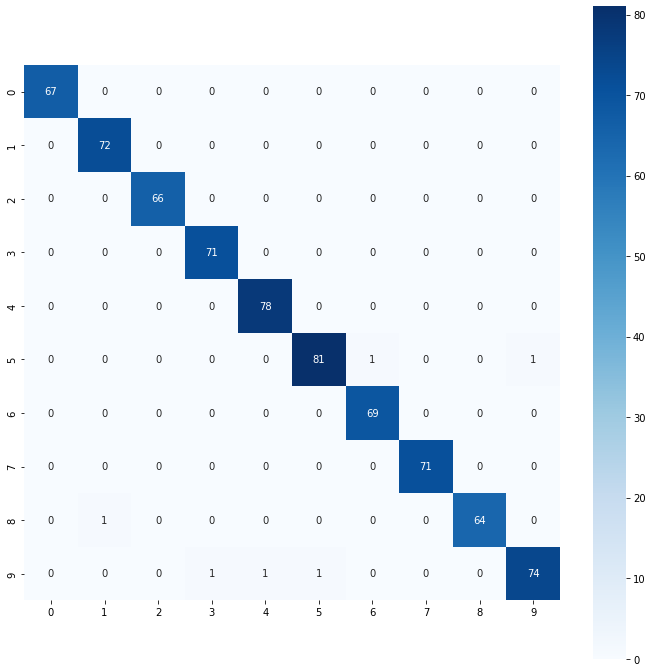

In [28]:
plt.figure(figsize=(12,12)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g')

На матрице видим, что влгоритм предсказывает часто 8, для 1. 9 для 7. 3 для 8. Возможно написания этих цифр действительно похожи.  
К сожалению мы обучались не на полном датасете, а на его части, причем с пониженной размерностью, поэтому результаты не столь живописны :)

### Тюнинг гиперпараметров

Как улучшить качество предсказания?

Самый просто способ для того чтобы подобрать лучший параметр - это перебрать их ВСЕ с помощью [GridSearch](http://scikit-learn.org/stable/modules/grid_search.html)

![](https://pp.userapi.com/c639616/v639616016/4938d/-9s9ffsvAC0.jpg)

In [29]:
from sklearn.model_selection import GridSearchCV

Найдем значения n_neighbors и p при котором качество классификации на кроссвалидации максимально.



In [30]:
params = {
    "n_neighbors": np.arange(2, 10), 
    "p": [2,4]
}

search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), verbose=2)
%time search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 115 ms, sys: 62.4 ms, total: 177 ms
Wall time: 10.1 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [2, 4]},
             verbose=2)

BEST: score=0.9894227793252863, params={'n_neighbors': 3, 'p': 2}


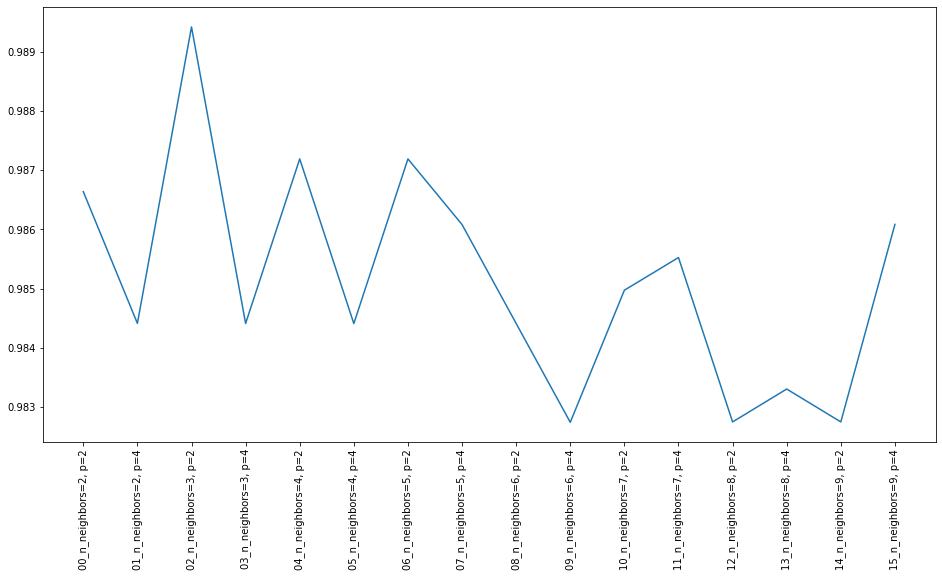

In [31]:
x_ticks = ["{:02d}_n_neighbors={}, p={}".format(i, p['n_neighbors'], p['p']) for i,p in enumerate(search.cv_results_['params'])]

plt.figure(figsize=(16,8))
plt.plot(x_ticks, search.cv_results_['mean_test_score'])
_ =plt.xticks(rotation=90)

print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00        66
           3       0.99      1.00      0.99        71
           4       0.99      1.00      0.99        78
           5       0.99      0.99      0.99        83
           6       0.99      1.00      0.99        69
           7       1.00      0.99      0.99        71
           8       0.98      0.97      0.98        65
           9       0.99      0.95      0.97        77

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719



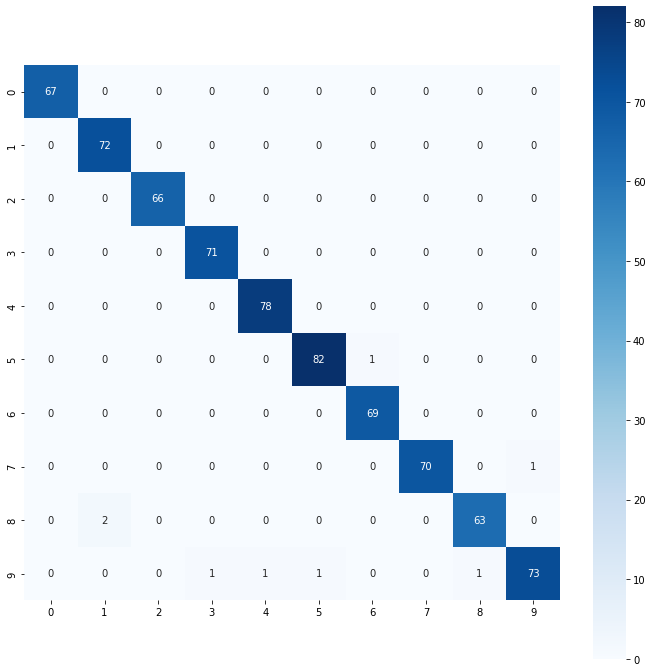

In [32]:
clf = KNeighborsClassifier(n_neighbors=3, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype('int')

print(classification_report(y_test, y_pred))

plt.figure(figsize=(12,12))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, square=True, annot=True, fmt='.3g')

In [33]:
clf = KNeighborsClassifier(n_neighbors=3, p=2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
%time scores = cross_val_score(clf, X, y, cv=cv)
print("Accuracy: {}".format(scores.mean()))
# с настройками по умолчанию было 0.9838396055603897

CPU times: user 885 ms, sys: 285 ms, total: 1.17 s
Wall time: 166 ms
Accuracy: 0.9894227793252863


## Подбор гиперпараметров

Посмотрим на более наглядный пример подбора гипер параметров и важность масштабирования признаков.

Рассмотрим датасет с винишком: https://www.openml.org/d/187

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('./data/dataset_191_wine.csv.zip')
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
X = df.drop(['class'], axis=1)
y = df['class']

Переберем в лоб количество соседей `k`.

Best K = 1


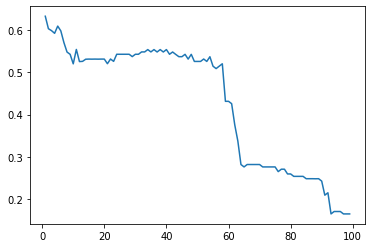

In [37]:
cv = KFold(n_splits=5, shuffle=False) # фиксируем разбиения! Выключаем перемешивание для повтора результатов

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean()
    for k in k_vals
]

print("Best K = {}".format(k_vals[np.argmax(quality_by_k)]))
plt.plot(k_vals, quality_by_k)

Наилучший результат при 1-м соседе? Выглядит как некоторая форма вырождения модели. 

Обратим внимание, что масштаб признаков очень разный. Необходимо нормировать признаки.

In [38]:
df.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Best K = 16


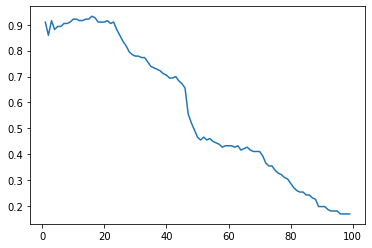

In [39]:
from sklearn.preprocessing import scale
X_scaled = scale(X) # включим масштабирование
cv = KFold(n_splits=5, shuffle=False)

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X_scaled, y, cv=cv).mean()
    for k in k_vals
]

print("Best K = {}".format(k_vals[np.argmax(quality_by_k)]))
plt.plot(k_vals, quality_by_k)

16 соседей - уже лучше. Да и качество стало не 0.65, а около 0.9 по accuracy.

Теперь подберем наилучшую метрику.

1.0 0.9384126984126985


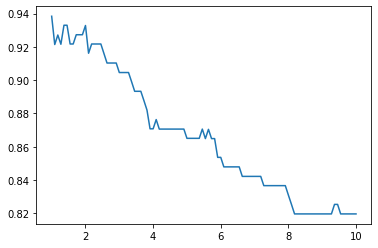

In [40]:
X_scaled = scale(X)
cv = KFold(n_splits=5, shuffle=False)

p_vals = np.linspace(1, 10, 100)
quality_by_p = [
    cross_val_score(KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=p), X_scaled, y, cv=cv).mean()
    for p in p_vals
]

print(p_vals[np.argmax(quality_by_p)], np.max(quality_by_p))
plt.plot(p_vals, quality_by_p)

Победила манхэттенская метрика.